<a href="https://colab.research.google.com/github/lindasheila/python-web-traffic-analysis/blob/main/Copy_of_%5BGuiding_Notebook%5D_AfterWork_Data_Filtering_with_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AfterWork: Data Filtering with Python Project

## 1. Business Understanding

FictionaTech has set its sights on several key objectives, which encompass both user-centric and performance-related goals:

**1. User-Centric Optimization:** The company aims to offer its users a seamless and personalized online experience. Jane's role is to harness the power of data analysis to understand user behavior and tailor content accordingly.

**2. Performance Enhancement:** Peak server performance is non-negotiable. Jane's analysis helps identify areas for improvement in server efficiency and ensures that FictionaTech delivers swift and reliable web services.

**3. Content Customization:** FictionaTech recognizes the importance of content personalization. Jane's insights enable the company to offer relevant and engaging content that resonates with each user.


In this dynamic environment, Jane plays a pivotal role in steering FictionaTech toward digital excellence. As part of her responsibilities, she embarks on a journey to unlock valuable insights through data filtering techniques, aiding the company in achieving its core objectives.

She embarks on a mission to tackle the following critical research questions:
1. Retrieve the first 20 log entries to explore the dataset/
2. What are the log records with the HTTP status code '404 Not Found'?
3. Identify log entries with server response times exceeding 100 milliseconds
4. Retrieve data for the specific web page of interest: '/products.html'
5. Filter records for user agents matching 'Safari 15.0'
6. Filter records with HTTP status codes '200 OK' and '404 Not Found'
7. Select log entries for a specific date, e.g., '2023-10-29'.
8. Select log entries with a status code of '200 OK' and user agents matching 'Safari 15.0'.
9. Find log entries with response times between 50 and 100 milliseconds.
10. Filter log entries for bytes transferred between 1024 and 4096 bytes.



## 2. Data Loading

In [ ]:
# Import the prerequisite libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the web server log dataset

df=pd.read_csv('https://bit.ly/3FF0VA8')
# Display the first few rows of the dataset for initial inspection
df.head(20)

,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
0,2023-10-30 08:00:01,192.168.1.1,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
1,2023-10-30 08:03:12,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
2,2023-10-30 08:05:05,192.168.1.3,GET,200,/products.html,Safari 15.0,NaN,4096,80.0
3,2023-10-30 08:10:17,192.168.1.4,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
4,2023-10-30 08:15:22,192.168.1.5,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0
5,2023-10-30 08:20:30,192.168.1.6,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
6,2023-10-30 08:25:41,192.168.1.7,GET,404,/about.html,Firefox 100.0,NaN,0,120.0
7,2023-10-30 08:30:55,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,NaN
8,2023-10-30 08:35:01,192.168.1.9,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
9,2023-10-30 08:40:12,192.168.1.10,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0


We have columns for timestamp, IP address, HTTP method, HTTP status code, URL, user agent, referrer, bytes transferred, and server response time.

### 3. Data Exploration

In [ ]:
# Calculate summary statistics for numerical columns
print(df.dtypes)
summary_stats_allNum = df[['Bytes Transferred', 'Server Response Time', 'HTTP Status Code']].describe()
print(summary_stats_allNum)
summary_stats = df[['Bytes Transferred', 'Server Response Time']].describe()
summary_stats

Timestamp                object
IP Address               object
HTTP Method              object
HTTP Status Code          int64
URL                      object
User Agent               object
Referrer                 object
Bytes Transferred         int64
Server Response Time    float64
dtype: object
       Bytes Transferred  Server Response Time  HTTP Status Code
count          54.000000             49.000000         54.000000
mean         3185.777778             71.836735        237.777778
std          3008.004282             26.289531         79.987420
min             0.000000             48.000000        200.000000
25%          1024.000000             55.000000        200.000000
50%          2048.000000             65.000000        200.000000
75%          4096.000000             80.000000        200.000000
max          8192.000000            120.000000        404.000000


,Bytes Transferred,Server Response Time
count,54.000000,49.000000
mean,3185.777778,71.836735
std,3008.004282,26.289531
min,0.000000,48.000000
25%,1024.000000,55.000000
50%,2048.000000,65.000000
75%,4096.000000,80.000000
max,8192.000000,120.000000


**Bytes Transferred:**

* Count: There are 54 records with non-missing values for this column.
* Mean: On average, the amount of data transferred is approximately 3185.78 bytes.
* Standard Deviation: The data transfer varies with a standard deviation of approximately 3008.00 bytes.
* Min: The minimum data transfer size is 0 bytes, indicating no data transferred in some cases.
* 25th Percentile (Q1): At least 25% of the transfers have a size of 1024 bytes or less.
* Median (50th Percentile, Q2): The median data transfer size is 2048 bytes, separating the dataset into two equal halves.
* 75th Percentile (Q3): At least 75% of the transfers have a size of 4096 bytes or less.
* Max: The maximum data transfer size observed is 8192 bytes.

**Server Response Time:**

* Count: There are 49 records with non-missing values for this column.
* Mean: On average, the server response time is approximately 71.84 milliseconds.
* Standard Deviation: The response time varies with a standard deviation of approximately 26.29 milliseconds.
* Min: The fastest response time observed is 48 milliseconds.
* 25th Percentile (Q1): At least 25% of the response times are 55 milliseconds or faster.
* Median (50th Percentile, Q2): The median response time is 65 milliseconds.
* 75th Percentile (Q3): At least 75% of the response times are 80 milliseconds or faster.
* Max: The slowest response time observed is 120 milliseconds.

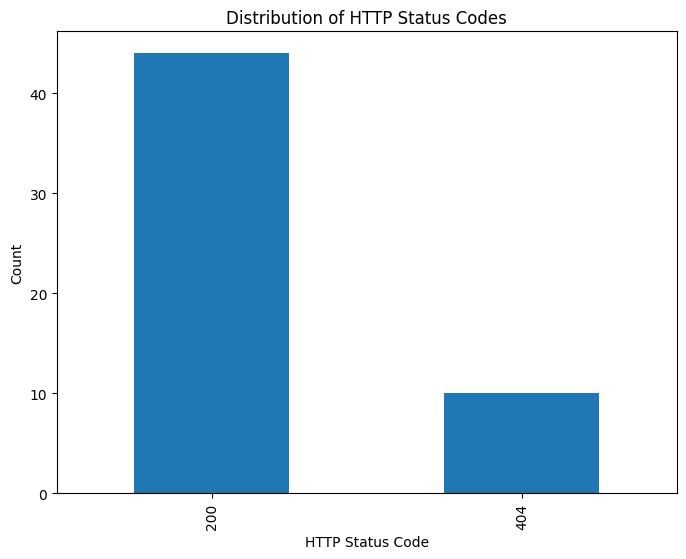

In [ ]:
# Visualize the distribution of HTTP status codes
plt.figure(figsize=(8, 6))
df['HTTP Status Code'].value_counts().plot(kind='bar')
plt.title('Distribution of HTTP Status Codes')
plt.xlabel('HTTP Status Code')
plt.ylabel('Count')
plt.show()

### 4. Data Cleaning

In [ ]:
# Check for missing values
print('Check  if there is a missing value:',df.isnull().any().any())
missing_values = df.isnull().sum()
print(missing_values)
print(df.isnull().any(axis=1)) #missing rows


Check  if there is a missing value: True
Timestamp               0
IP Address              0
HTTP Method             0
HTTP Status Code        0
URL                     0
User Agent              0
Referrer                9
Bytes Transferred       0
Server Response Time    5
dtype: int64
0     False
1     False
2      True
3     False
4     False
5     False
6      True
7      True
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16     True
17     True
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25    False
26     True
27     True
28    False
29    False
30    False
31    False
32     True
33    False
34    False
35    False
36     True
37     True
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46     True
47    False
48    False
49    False
50    False
51     True
52    False
53    False
dtype: bool


We have missing values in the "Referrer" and "Bytes Transferred" columns.

In [ ]:
# Check for duplicate records
duplicate_records = df.duplicated().sum()
print('The Total of number of duplicate records:', duplicate_records)

df[df.duplicated()]

#df.duplicated()

The Total of number of duplicate records: 4


,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
40,2023-10-30 11:10:15,192.168.1.10,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0
41,2023-10-30 11:10:15,192.168.1.10,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0
43,2023-10-30 11:15:17,192.168.1.1,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
44,2023-10-30 11:15:17,192.168.1.1,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0


In [ ]:
# Handle missing values
#df['Referrer'].fillna('N/A', inplace=True)
#df['Server Response Time'].fillna(0, inplace=True)

df['Referrer'] = df['Referrer'].fillna('N/A')
df['Server Response Time'] = df['Server Response Time'].fillna(0)

# Check for missing values
df.isnull().sum()
df

,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
0,2023-10-30 08:00:01,192.168.1.1,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
1,2023-10-30 08:03:12,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
2,2023-10-30 08:05:05,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
3,2023-10-30 08:10:17,192.168.1.4,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
4,2023-10-30 08:15:22,192.168.1.5,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0
5,2023-10-30 08:20:30,192.168.1.6,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
6,2023-10-30 08:25:41,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
7,2023-10-30 08:30:55,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
8,2023-10-30 08:35:01,192.168.1.9,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
9,2023-10-30 08:40:12,192.168.1.10,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0


In [ ]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

# Check for duplicates
print(df.duplicated().sum())
print('Check  if there is a missing value:',df.isnull().any().any())

0
Check  if there is a missing value: False


### 5. Data Analysis

 We need to explore the dataset to gain an initial understanding of its structure and contents, which can help us identify any data anomalies, patterns, or specific areas of interest.

In [ ]:
# 1. Can you retrieve the first 20 log entries to explore the dataset using .iloc[]?

# Use iloc to select the first 20 rows
first_twenty_rows = df.iloc[0:20]

# Display first_five_rows
first_twenty_rows


,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
0,2023-10-30 08:00:01,192.168.1.1,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
1,2023-10-30 08:03:12,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
2,2023-10-30 08:05:05,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
3,2023-10-30 08:10:17,192.168.1.4,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
4,2023-10-30 08:15:22,192.168.1.5,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0
5,2023-10-30 08:20:30,192.168.1.6,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
6,2023-10-30 08:25:41,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
7,2023-10-30 08:30:55,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
8,2023-10-30 08:35:01,192.168.1.9,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
9,2023-10-30 08:40:12,192.168.1.10,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0


Identifying '404 Not Found' records is crucial for understanding and resolving broken or missing links on the website, which can lead to a better user experience.

In [ ]:
# 2. What are the log records with the HTTP status code '404 Not Found'?

df.columns
FictionaTech = df.loc[df['HTTP Status Code'] == 404]
FictionaTech


,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
1,2023-10-30 08:03:12,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
6,2023-10-30 08:25:41,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
11,2023-10-30 08:50:38,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
16,2023-10-30 09:15:15,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
21,2023-10-30 09:40:40,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
26,2023-10-30 10:05:12,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
31,2023-10-30 10:30:30,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
36,2023-10-30 10:55:55,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
45,2023-10-30 11:20:20,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
50,2023-10-30 11:45:45,192.168.1.7,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0


Unusually long response times can impact user experience and indicate potential performance issues that need attention.

In [ ]:

# some stats
FictionaTechstats = df.loc[df['HTTP Status Code'] == 404].describe()
print(FictionaTechstats)


       HTTP Status Code  Bytes Transferred  Server Response Time
count              10.0               10.0                  10.0
mean              404.0                0.0                 120.0
std                 0.0                0.0                   0.0
min               404.0                0.0                 120.0
25%               404.0                0.0                 120.0
50%               404.0                0.0                 120.0
75%               404.0                0.0                 120.0
max               404.0                0.0                 120.0


In [ ]:
# 3. Can you identify log entries with server response times exceeding 100 milliseconds?
df.columns

FictionaTech = df.loc[df['Server Response Time'] > 100]
FictionaTech

,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
1,2023-10-30 08:03:12,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
6,2023-10-30 08:25:41,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
11,2023-10-30 08:50:38,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
16,2023-10-30 09:15:15,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
21,2023-10-30 09:40:40,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
26,2023-10-30 10:05:12,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
31,2023-10-30 10:30:30,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
36,2023-10-30 10:55:55,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
45,2023-10-30 11:20:20,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
50,2023-10-30 11:45:45,192.168.1.7,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0


By retrieving data for specific web pages, we can analyze user interactions with those pages and make informed decisions regarding content and user engagement.

In [ ]:
# 4. Retrieve data for the specific web page of interest: '/products.html'
df.columns
value_exists = df.isin(['/products.html']).any().any()
print(value_exists)
matching_columns = df.columns[df.isin(['/products.html']).any()]
print(matching_columns)
electronics_df = df.loc[df['URL'] == '/products.html']
electronics_df



True
Index(['URL'], dtype='object')


,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
2,2023-10-30 08:05:05,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
7,2023-10-30 08:30:55,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
12,2023-10-30 08:55:41,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
17,2023-10-30 09:20:20,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
22,2023-10-30 09:45:45,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
27,2023-10-30 10:10:15,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
32,2023-10-30 10:35:35,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
37,2023-10-30 11:00:01,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
46,2023-10-30 11:25:25,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
51,2023-10-30 11:50:50,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.yahoo.com,4096,0.0


Filtering records for specific user agents helps in understanding user preferences and tailoring content for different browser types.

In [ ]:
# 5. Filter records for user agents matching 'Safari 15.0.'
df.columns

filterAgent=df.loc[df['User Agent']=='Safari 15.0']
filterAgent

,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
2,2023-10-30 08:05:05,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
7,2023-10-30 08:30:55,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
12,2023-10-30 08:55:41,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
17,2023-10-30 09:20:20,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
22,2023-10-30 09:45:45,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
27,2023-10-30 10:10:15,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
32,2023-10-30 10:35:35,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
37,2023-10-30 11:00:01,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
46,2023-10-30 11:25:25,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
51,2023-10-30 11:50:50,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.yahoo.com,4096,0.0


Identifying records with specific HTTP status codes allows us to focus on successful and failed requests, which are essential for user experience and troubleshooting.

In [ ]:
# 6. Filter records with HTTP status codes '200 OK' and '404 Not Found'
df.columns
filterAgent=df.loc[(df['HTTP Status Code']== 200)  | (df['HTTP Status Code'] == 404 )]

filterAgent

,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
0,2023-10-30 08:00:01,192.168.1.1,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
1,2023-10-30 08:03:12,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
2,2023-10-30 08:05:05,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
3,2023-10-30 08:10:17,192.168.1.4,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
4,2023-10-30 08:15:22,192.168.1.5,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0
5,2023-10-30 08:20:30,192.168.1.6,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
6,2023-10-30 08:25:41,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
7,2023-10-30 08:30:55,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
8,2023-10-30 08:35:01,192.168.1.9,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
9,2023-10-30 08:40:12,192.168.1.10,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0


Selecting records for a specific date helps in understanding user behavior and server performance on that particular day.

In [ ]:
# 7. Can you select log entries for a specific date, e.g., '2023-10-29'?

df.dtypes
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df.dtypes)



filterAgent = df.loc[df['Timestamp'].dt.date == pd.to_datetime('2023-10-30').date()]


value_exists = df.isin(['2023-10-29']).any().any()

print('Does 2023-10-29 exist?',value_exists)
filterAgent

Timestamp               datetime64[ns]
IP Address                      object
HTTP Method                     object
HTTP Status Code                 int64
URL                             object
User Agent                      object
Referrer                        object
Bytes Transferred                int64
Server Response Time           float64
dtype: object
Does 2023-10-29 exist? False


<ipython-input-17-f36108dbf594>:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  value_exists = df.isin(['2023-10-29']).any().any()


,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
0,2023-10-30 08:00:01,192.168.1.1,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
1,2023-10-30 08:03:12,192.168.1.2,GET,404,/about.html,Firefox 100.0,https://www.bing.com,0,120.0
2,2023-10-30 08:05:05,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
3,2023-10-30 08:10:17,192.168.1.4,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
4,2023-10-30 08:15:22,192.168.1.5,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0
5,2023-10-30 08:20:30,192.168.1.6,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
6,2023-10-30 08:25:41,192.168.1.7,GET,404,/about.html,Firefox 100.0,N/A,0,120.0
7,2023-10-30 08:30:55,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
8,2023-10-30 08:35:01,192.168.1.9,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
9,2023-10-30 08:40:12,192.168.1.10,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0


Filtering based on specific conditions allows us to target and analyze specific user interactions, which can inform content customization and troubleshooting.

In [ ]:
# 8. Select log entries with a status code of '200 OK' and user agents matching 'Safari 15.0'
df.columns
df.loc[(df['User Agent']=='Safari 15.0') & (df['HTTP Status Code']==200)]
value_exists = df.isin(['Safari 15.0']).any().any()
print(value_exists)
value_existsCol = df.isin(['Safari 15.0']).any()
print(value_existsCol)
df.loc[(df['User Agent']=='Safari 15.0') & (df['HTTP Status Code']==200)]


True
Timestamp               False
IP Address              False
HTTP Method             False
HTTP Status Code        False
URL                     False
User Agent               True
Referrer                False
Bytes Transferred       False
Server Response Time    False
dtype: bool


,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
2,2023-10-30 08:05:05,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
7,2023-10-30 08:30:55,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
12,2023-10-30 08:55:41,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
17,2023-10-30 09:20:20,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
22,2023-10-30 09:45:45,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
27,2023-10-30 10:10:15,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
32,2023-10-30 10:35:35,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
37,2023-10-30 11:00:01,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.bing.com,4096,0.0
46,2023-10-30 11:25:25,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
51,2023-10-30 11:50:50,192.168.1.8,GET,200,/products.html,Safari 15.0,https://www.yahoo.com,4096,0.0


Identifying log entries with response times within a specific range helps in ensuring optimal server performance and user experience.

In [ ]:
# 9. Find log entries with response times between 50 and 100 milliseconds.
df.columns
df.loc[(df['Server Response Time']<100) & (df['Server Response Time'] >50)]

,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
0,2023-10-30 08:00:01,192.168.1.1,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
2,2023-10-30 08:05:05,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
4,2023-10-30 08:15:22,192.168.1.5,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0
5,2023-10-30 08:20:30,192.168.1.6,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
9,2023-10-30 08:40:12,192.168.1.10,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0
10,2023-10-30 08:45:24,192.168.1.1,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
12,2023-10-30 08:55:41,192.168.1.3,GET,200,/products.html,Safari 15.0,N/A,4096,80.0
14,2023-10-30 09:05:05,192.168.1.5,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0
15,2023-10-30 09:10:10,192.168.1.6,GET,200,/index.html,Chrome 98.0,https://www.google.com,1024,55.0
19,2023-10-30 09:30:30,192.168.1.10,POST,200,/contact.html,Edge 20.0,https://www.duckduckgo.com,8192,65.0


Filtering based on byte ranges can help identify data transfer patterns and potential optimization opportunities, such as image compression or content delivery.

In [ ]:
# 10. Filter log entries for bytes transferred between 1024 and 4096 bytes.
df.columns

df.loc[(df['Bytes Transferred']<4096) & (df['Bytes Transferred'] >1024)]


,Timestamp,IP Address,HTTP Method,HTTP Status Code,URL,User Agent,Referrer,Bytes Transferred,Server Response Time
3,2023-10-30 08:10:17,192.168.1.4,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
8,2023-10-30 08:35:01,192.168.1.9,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
13,2023-10-30 09:00:52,192.168.1.4,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
18,2023-10-30 09:25:25,192.168.1.9,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
23,2023-10-30 09:50:50,192.168.1.4,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
28,2023-10-30 10:15:17,192.168.1.9,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
33,2023-10-30 10:40:40,192.168.1.4,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
38,2023-10-30 11:05:12,192.168.1.9,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
47,2023-10-30 11:30:30,192.168.1.4,GET,200,/index.html,Chrome 98.0,https://www.yahoo.com,2048,48.0
52,2023-10-30 11:55:55,192.168.1.9,GET,200,/index.html,Chrome 98.0,https://www.duckduckgo.com,2048,48.0


In [ ]:
df.columns
df.groupby('URL')[['Bytes Transferred','Server Response Time']].sum().sort_values(by=['Bytes Transferred', 'Server Response Time'], ascending=False)



,Bytes Transferred,Server Response Time
URL,,
/contact.html,81920,650.0
/products.html,40960,400.0
/index.html,30720,1030.0
/about.html,0,1200.0


In [ ]:
df.groupby('HTTP Status Code')[['User Agent']].size()

,0
HTTP Status Code,
200,40
404,10


In [ ]:
df.groupby('User Agent')[['HTTP Status Code']].size()
print(df.shape)
df.groupby('User Agent')[['HTTP Status Code']].size()

(50, 9)


,0
User Agent,
Chrome 98.0,20
Edge 20.0,10
Firefox 100.0,10
Safari 15.0,10


In [ ]:
df.groupby('HTTP Status Code')[['Bytes Transferred','Server Response Time']].sum().sort_values(by=['Bytes Transferred', 'Server Response Time'], ascending=False)



,Bytes Transferred,Server Response Time
HTTP Status Code,,
200,153600,2080.0
404,0,1200.0


In [ ]:
df.columns
df.groupby('User Agent')[['Bytes Transferred','Server Response Time']].sum().sort_values(by=['Bytes Transferred', 'Server Response Time'], ascending=False)



,Bytes Transferred,Server Response Time
User Agent,,
Edge 20.0,81920,650.0
Safari 15.0,40960,400.0
Chrome 98.0,30720,1030.0
Firefox 100.0,0,1200.0


### 6. Recommendations



Optimize Server Response Times

From the Server Response Time data, we can see that some URLs have significantly high response times (e.g., /index.html with 1030 ms, /about.html with 1200 ms).

Recommendation:

The Compagny should focus on optimizing server performance, particularly for pages with high server response times. They should look into possible issues such as inefficient code, server load, or network latency, especially for pages like /about.html, which has a notably high response time of 1200 ms.




Investigate Low Traffic for Certain User Agents

 The user agent breakdown shows that Firefox 100.0  has minimal traffic (0 for Bytes Transferred in Firefox).
    
Recommendation:

 Investigate why Firefox 100.0 had no data transferred. Is there a compatibility issue or a specific problem affecting Firefox users? If this issue is found to be a bug, The Compaagny should prioritize fixing it to ensure proper traffic handling for all user agents.


Handle 404 Errors Effectively

 There were 10 instances of a 404 Not Found error, but it transferred no bytes (indicating no actual content was delivered for those requests).
    
    
Recommendation:

The Compagny should review the URLs associated with 404 errors to ensure that they either redirect correctly to valid content or provide meaningful error pages. Implement redirects for any outdated or incorrect URLs to prevent users from hitting 404 errors.



Traffic Distribution Across Different User Agents

Edge has the highest amount of data transferred (81,920 bytes), followed by Safari 15.0 (40,960 bytes), and Chrome 98.0 and Firefox 100.0 with significantly lower transferred bytes.
    
Recommendation:

Given that Edge is showing the highest traffic, the Compagny should  ensure that the site is optimized for this browser. Similarly,  they should test and optimize for Safari 15.0 and Chrome 98.0 since they also represent a sizable portion of the user traffic. Lastly the Compagny should consider performing more extensive testing on Firefox 100.0, as it seems to have issues (0 bytes transferred).


Monitor and Reduce Over-Transferred Data

For HTTP Status Code 200, the Bytes Transferred is large (153,600 bytes), which might indicate that large files (such as images, videos, or downloadable resources) are being transferred.

Recommendation:

The Compagny should investigate the content being served to reduce file sizes where possible. For example, compressing images and optimizing videos for faster loading will improve performance and reduce the bandwidth used. Additionally, implement content delivery networks to offload content delivery, improving response time and reducing server load.


Ensure Consistency Across Different HTTP Status Codes

There are significant disparities in Bytes Transferred between the 200 OK (153,600 bytes) and 404 Not Found (0 bytes) HTTP status codes.


Recommendation:

Regularly monitor server logs to ensure that 404 errors are minimized. These can indicate broken links or missing resources that can frustrate users. Implement a comprehensive error monitoring system to track and fix these errors quickly.




Improve Traffic Handling for High-Traffic URLs

 Some URLs have significantly higher traffic, such as /contact.html and /products.html, based on the bytes transferred.

Recommendation:

The Compagny should ensure that the server can handle high traffic efficiently. If some URLs consistently receive more traffic, prioritize optimizing these URLs for faster load times and lower server response times.
